# EastWest_Clustering Assignment  

# Import Necessary Libraries 

In [39]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
from sklearn.preprocessing import scale
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

# Import Data 

In [40]:
ewa=pd.read_excel('/Users/viswanathareddy/Assignments /Clustering /EastWestAirlines.xlsx',sheet_name='data')
ewa

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 12 columns]

# Data Understanding 

In [41]:
ewa.shape

(3999, 12)

In [42]:
ewa.head()

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1

In [43]:
ewa.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [44]:
ewa.describe()

ID#       Balance    Qual_miles    cc1_miles    cc2_miles  \
count  3999.000000  3.999000e+03   3999.000000  3999.000000  3999.000000   
mean   2014.819455  7.360133e+04    144.114529     2.059515     1.014504   
std    1160.764358  1.007757e+05    773.663804     1.376919     0.147650   
min       1.000000  0.000000e+00      0.000000     1.000000     1.000000   
25%    1010.500000  1.852750e+04      0.000000     1.000000     1.000000   
50%    2016.000000  4.309700e+04      0.000000     1.000000     1.000000   
75%    3020.500000  9.240400e+04      0.000000     3.000000     1.000000   
max    4021.000000  1.704838e+06  11148.000000     5.000000     3.000000   

         cc3_miles    Bonus_miles  Bonus_trans  Flight_miles_12mo  \
count  3999.000000    3999.000000   3999.00000        3999.000000   
mean      1.012253   17144.846212     11.60190         460.055764   
std       0.195241   24150.967826      9.60381        1400.209171   
min       1.000000       0.000000      0.00000           0.000000   
25%       1.000000    1250.000000      3.00000           0.000000   
50%       1.000000    7171.000000     12.00000           0.000000   
75%       1.000000   23800.500000     17.00000         311.000000   
max       5.000000  263685.000000     86.00000       30817.000000   

       Flight_trans_12  Days_since_enroll       Award?  
count      3999.000000         3999.00000  3999.000000  
mean          1.373593         4118.55939     0.370343  
std           3.793172         2065.13454     0.482957  
min           0.000000            2.00000     0.000000  
25%           0.000000         2330.00000     0.000000  
50%           0.000000         4096.00000     0.000000  
75%           1.000000         5790.50000     1.000000  
max          53.000000         8296.00000     1.000000

In [45]:
ewa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [46]:
def norm_fun(i):
      x=(i-i.min())/(i.max()-i.min())
      return(x)

In [47]:
df_norm=norm_fun(ewa.iloc[:,1:])
df_norm.describe()

Balance   Qual_miles    cc1_miles    cc2_miles    cc3_miles  \
count  3999.000000  3999.000000  3999.000000  3999.000000  3999.000000   
mean      0.043172     0.012927     0.264879     0.007252     0.003063   
std       0.059112     0.069399     0.344230     0.073825     0.048810   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.010868     0.000000     0.000000     0.000000     0.000000   
50%       0.025279     0.000000     0.000000     0.000000     0.000000   
75%       0.054201     0.000000     0.500000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
count  3999.000000  3999.000000        3999.000000      3999.000000   
mean      0.065020     0.134906           0.014929         0.025917   
std       0.091590     0.111672           0.045436         0.071569   
min       0.000000     0.000000           0.000000         0.000000   
25%       0.004741     0.034884           0.000000         0.000000   
50%       0.027195     0.139535           0.000000         0.000000   
75%       0.090261     0.197674           0.010092         0.018868   
max       1.000000     1.000000           1.000000         1.000000   

       Days_since_enroll       Award?  
count        3999.000000  3999.000000  
mean            0.496330     0.370343  
std             0.248991     0.482957  
min             0.000000     0.000000  
25%             0.280685     0.000000  
50%             0.493610     0.000000  
75%             0.697914     1.000000  
max             1.000000     1.000000

In [48]:
z=linkage(df_norm,method="complete",metric="euclidean")

In [49]:
trans=MinMaxScaler()
data=pd.DataFrame(trans.fit_transform(ewa.iloc[:,1:]))
data

0    1     2    3    4         5         6         7         8   \
0     0.016508  0.0  0.00  0.0  0.0  0.000660  0.011628  0.000000  0.000000   
1     0.011288  0.0  0.00  0.0  0.0  0.000815  0.023256  0.000000  0.000000   
2     0.024257  0.0  0.00  0.0  0.0  0.015636  0.046512  0.000000  0.000000   
3     0.008667  0.0  0.00  0.0  0.0  0.001896  0.011628  0.000000  0.000000   
4     0.057338  0.0  0.75  0.0  0.0  0.164211  0.302326  0.067398  0.075472   
...        ...  ...   ...  ...  ...       ...       ...       ...       ...   
3994  0.010837  0.0  0.00  0.0  0.0  0.032330  0.046512  0.006490  0.018868   
3995  0.037766  0.0  0.00  0.0  0.0  0.003720  0.058140  0.000000  0.000000   
3996  0.043169  0.0  0.50  0.0  0.0  0.096505  0.093023  0.000000  0.000000   
3997  0.032202  0.0  0.00  0.0  0.0  0.001896  0.011628  0.016225  0.018868   
3998  0.001769  0.0  0.00  0.0  0.0  0.000000  0.000000  0.000000  0.000000   

            9    10  
0     0.843742  0.0  
1     0.839884  0.0  
2     0.847842  0.0  
3     0.837955  0.0  
4     0.835905  1.0  
...        ...  ...  
3994  0.168917  1.0  
3995  0.167953  1.0  
3996  0.168797  1.0  
3997  0.168676  0.0  
3998  0.168314  0.0  

[3999 rows x 11 columns]

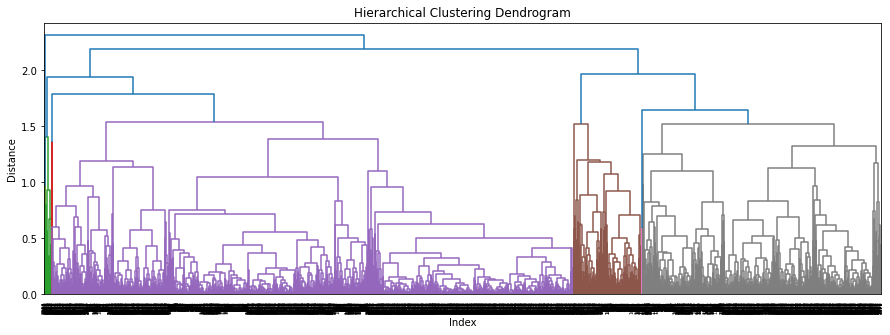

In [50]:
#p=np.array(df_norm) # converting into numpy array format.
z=linkage(df_norm,method="complete",metric="euclidean")
plt.figure(figsize=(15,5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
     #Leaf_rotation=0.,  #rotates the x axis labels
     #leaf_font_size=8.,  #font size for the x axis labels
)
plt.show()


In [51]:
h_complete = AgglomerativeClustering(n_clusters=5, linkage='complete',affinity = "euclidean").fit(df_norm) 
cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
ewa['clust']=cluster_labels # creating a  new column and assigning it to new column 
ewa

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  clust  
0          0      0  
1          0      0  
2          0      0  
3          0      0  
4          1      1  
...      ...    ...  
3994       1      2  
3995       1      2  
3996       1      2  
3997       0      0  
3998       0      0  

[3999 rows x 13 columns]

In [52]:
ewa.iloc[:,1:].groupby(ewa.clust).mean()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
clust                                                               
0       59968.433667   88.883768   1.712224   1.000401   1.011222   
1      157084.578462  208.673846   4.661538   1.000000   1.061538   
2       80173.963287  248.550699   2.104895   1.009615   1.000874   
3      131999.500000  347.000000   2.500000   1.000000   1.000000   
4       45515.064516   32.258065   1.000000   2.483871   1.000000   

        Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
clust                                                                  
0      10271.530261     9.105812         227.797194         0.656112   
1      70477.086154    23.249231        1019.433846         3.196923   
2      16882.864510    13.412587         739.958916         2.236888   
3      65634.250000    69.250000       19960.000000        49.250000   
4      14618.870968    16.129032         443.225806         1.967742   

       Days_since_enroll    Award?  clust  
clust                                      
0            3825.392786  0.000802    0.0  
1            5770.572308  1.000000    1.0  
2            4304.383741  1.000000    2.0  
3            2200.250000  1.000000    3.0  
4            3784.258065  0.193548    4.0

In [53]:
scaler = StandardScaler()
ewa_subset = pd.DataFrame(scaler.fit_transform(ewa.iloc[:,1:]))
ewa_subset 

0         1         2         3         4         5         6   \
0    -0.451141 -0.186299 -0.769578 -0.098242 -0.062767 -0.702786 -1.104065   
1    -0.539457 -0.186299 -0.769578 -0.098242 -0.062767 -0.701088 -0.999926   
2    -0.320031 -0.186299 -0.769578 -0.098242 -0.062767 -0.539253 -0.791649   
3    -0.583799 -0.186299 -0.769578 -0.098242 -0.062767 -0.689286 -1.104065   
4     0.239678 -0.186299  1.409471 -0.098242 -0.062767  1.083121  1.499394   
...        ...       ...       ...       ...       ...       ...       ...   
3994 -0.547079 -0.186299 -0.769578 -0.098242 -0.062767 -0.356960 -0.791649   
3995 -0.091465 -0.186299 -0.769578 -0.098242 -0.062767 -0.669367 -0.687511   
3996 -0.000043 -0.186299  0.683121 -0.098242 -0.062767  0.343804 -0.375096   
3997 -0.185607 -0.186299 -0.769578 -0.098242 -0.062767 -0.689286 -1.104065   
3998 -0.700508 -0.186299 -0.769578 -0.098242 -0.062767 -0.709992 -1.208203   

            7         8         9         10        11  
0    -0.328603 -0.362168  1.395454 -0.766919 -0.730292  
1    -0.328603 -0.362168  1.379957 -0.766919 -0.730292  
2    -0.328603 -0.362168  1.411920 -0.766919 -0.730292  
3    -0.328603 -0.362168  1.372208 -0.766919 -0.730292  
4     1.154932  0.692490  1.363975  1.303918  0.332072  
...        ...       ...       ...       ...       ...  
3994 -0.185750 -0.098503 -1.315120  1.303918  1.394435  
3995 -0.328603 -0.362168 -1.318994  1.303918  1.394435  
3996 -0.328603 -0.362168 -1.315604  1.303918  1.394435  
3997  0.028531 -0.098503 -1.316088 -0.766919 -0.730292  
3998 -0.328603 -0.362168 -1.317541 -0.766919 -0.730292  

[3999 rows x 12 columns]

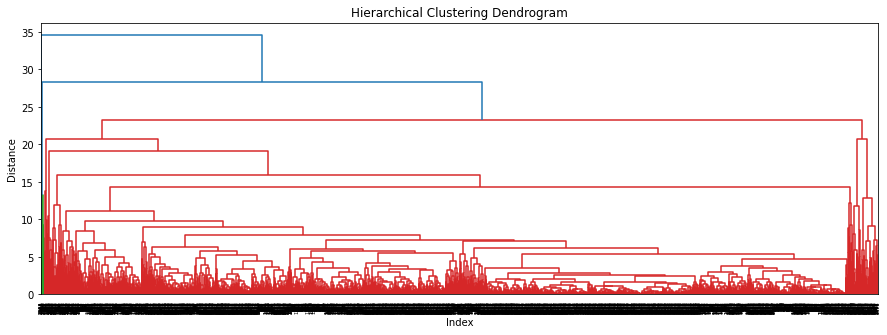

In [54]:
#p =np.array(df_norm) # converting into numpy array format
z=linkage(ewa_subset, method='complete',metric='euclidean')
plt.figure(figsize=(15,5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotarion=0., # rotates the x axis labels
    #leaf_font_size=8.,  #font size for the x axis labels
)
plt.show()

In [55]:
h_complete=AgglomerativeClustering(n_clusters=5, linkage='complete',affinity ="euclidean").fit(ewa_subset)
cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
ewa['clust']=cluster_labels#creating a new column and assigning it to new column 
ewa

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  clust  
0          0      0  
1          0      0  
2          0      0  
3          0      0  
4          1      0  
...      ...    ...  
3994       1      0  
3995       1      0  
3996       1      0  
3997       0      0  
3998       0      0  

[3999 rows x 13 columns]

In [56]:
k=list(range(2,20))

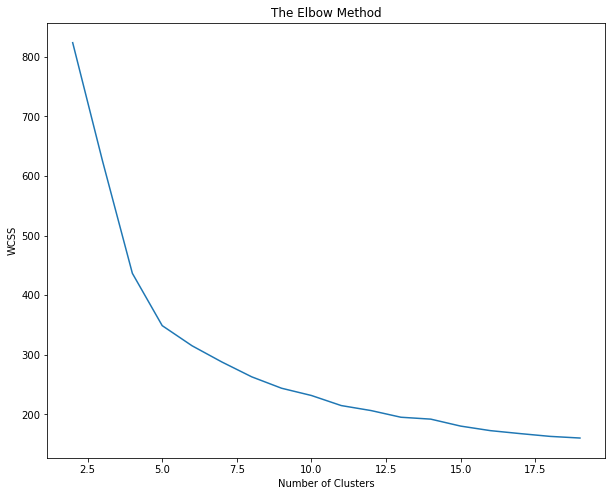

In [65]:
from sklearn.cluster import KMeans
fig = plt.figure(figsize=(10, 8))
WCSS = []
for v in k:
    clf = KMeans(n_clusters=v)
    clf.fit_predict(df_norm)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS
plt.plot(range(2, 20), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()

In [66]:
clf = KMeans(n_clusters=5)
y_kmeans = clf.fit_predict(df_norm)

In [67]:
y_kmeans
#clf.cluster_centers_
clf.labels_

array([0, 0, 0, ..., 3, 4, 4], dtype=int32)

In [68]:
md=pd.Series(y_kmeans)  # converting numpy array into pandas series object 
ewa['clust']=md # creating a  new column and assigning it to new column 
ewa.describe()

ID#       Balance    Qual_miles    cc1_miles    cc2_miles  \
count  3999.000000  3.999000e+03   3999.000000  3999.000000  3999.000000   
mean   2014.819455  7.360133e+04    144.114529     2.059515     1.014504   
std    1160.764358  1.007757e+05    773.663804     1.376919     0.147650   
min       1.000000  0.000000e+00      0.000000     1.000000     1.000000   
25%    1010.500000  1.852750e+04      0.000000     1.000000     1.000000   
50%    2016.000000  4.309700e+04      0.000000     1.000000     1.000000   
75%    3020.500000  9.240400e+04      0.000000     3.000000     1.000000   
max    4021.000000  1.704838e+06  11148.000000     5.000000     3.000000   

         cc3_miles    Bonus_miles  Bonus_trans  Flight_miles_12mo  \
count  3999.000000    3999.000000   3999.00000        3999.000000   
mean      1.012253   17144.846212     11.60190         460.055764   
std       0.195241   24150.967826      9.60381        1400.209171   
min       1.000000       0.000000      0.00000           0.000000   
25%       1.000000    1250.000000      3.00000           0.000000   
50%       1.000000    7171.000000     12.00000           0.000000   
75%       1.000000   23800.500000     17.00000         311.000000   
max       5.000000  263685.000000     86.00000       30817.000000   

       Flight_trans_12  Days_since_enroll       Award?        clust  
count      3999.000000         3999.00000  3999.000000  3999.000000  
mean          1.373593         4118.55939     0.370343     2.115779  
std           3.793172         2065.13454     0.482957     1.502657  
min           0.000000            2.00000     0.000000     0.000000  
25%           0.000000         2330.00000     0.000000     1.000000  
50%           0.000000         4096.00000     0.000000     2.000000  
75%           1.000000         5790.50000     1.000000     4.000000  
max          53.000000         8296.00000     1.000000     4.000000

In [69]:
ewa.iloc[:,1:7].groupby(ewa.clust).mean()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
clust                                                               
0       49921.633641   89.903226   1.122120   1.019585   1.001152   
1       83529.153046  290.453195   1.156018   1.032689   1.008915   
2      118297.325243   73.467638   3.584142   1.001618   1.022654   
3      108317.387376  198.336634   3.915842   1.001238   1.025990   
4       33097.301357   94.131783   1.070736   1.016473   1.006783   

        Bonus_miles  
clust                
0       3467.074885  
1       8850.395245  
2      31384.393204  
3      45609.657178  
4       3244.520349

Text(0.5, 1.0, 'Clusters using KMeans')

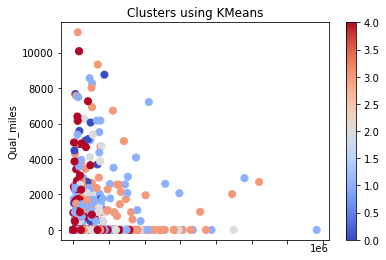

In [70]:
ewa.plot(x="Balance",y ="Qual_miles",c=clf.labels_,kind="scatter",s=50 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans')

Text(0.5, 1.0, 'Clusters using KMeans')

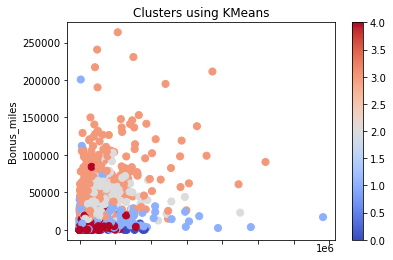

In [71]:
ewa.plot(x="Balance",y ="Bonus_miles",c=clf.labels_,kind="scatter",s=50 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans')

In [72]:
clf.inertia_

348.94332172541374

In [73]:
WCSS

[823.6756984125204,
 625.168488157072,
 436.7088576193262,
 348.9433217254137,
 315.1515406007403,
 287.94211409791137,
 263.04891963882994,
 243.9255171892869,
 231.74416152009462,
 214.83969901586022,
 206.4520994382399,
 195.2500578224216,
 192.07723899028966,
 180.40871450696127,
 172.76401688447788,
 167.78633548808477,
 163.13756396586894,
 160.37048619795343]

# DBSCAN

In [74]:
#Import the libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [75]:
# Import .csv file and convert it to a DataFrame object
df = pd.read_excel('/Users/viswanathareddy/Assignments /Clustering /EastWestAirlines.xlsx',sheet_name='data')

print(df.head())
df 

   ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1  


ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 12 columns]

In [76]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB
None


In [77]:
df1 = df.drop(['ID#'],axis=1)

In [78]:
array=df1.values
array

array([[28143,     0,     1, ...,     0,  7000,     0],
       [19244,     0,     1, ...,     0,  6968,     0],
       [41354,     0,     1, ...,     0,  7034,     0],
       ...,
       [73597,     0,     3, ...,     0,  1402,     1],
       [54899,     0,     1, ...,     1,  1401,     0],
       [ 3016,     0,     1, ...,     0,  1398,     0]])

In [79]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array) 
X 

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [80]:
dbscan = DBSCAN(eps=0.95, min_samples=5)
dbscan.fit(X)         

DBSCAN(eps=0.95)

In [81]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [82]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster']) 

In [83]:
cl
pd.set_option("display.max_rows", None)

In [84]:
cl

cluster
0           0
1           0
2           0
3           0
4           1
5           0
6           0
7           1
8          -1
9           1
10          0
11          1
12          0
13          0
14          0
15          1
16          1
17          1
18          1
19          1
20          1
21         -1
22         -1
23          0
24         -1
25          0
26          0
27          0
28          1
29          1
30          0
31          0
32         -1
33          0
34          0
35          1
36          1
37          0
38          1
39          1
40          0
41          1
42         -1
43         -1
44          0
45         -1
46          0
47          1
48          1
49          0
50         -1
51          0
52         -1
53          1
54          0
55          0
56          0
57          1
58          0
59         -1
60          0
61          0
62          0
63         -1
64          0
65         -1
66          0
67          0
68          1
69          1
70         -1
71          0
72         -1
73          0
74          0
75          0
76          0
77          0
78          1
79          1
80         -1
81          0
82          0
83          0
84          0
85          1
86          1
87         -1
88          0
89          1
90          1
91          0
92          1
93          1
94         -1
95          0
96          0
97          0
98          0
99          1
100        -1
101         1
102         0
103         1
104         0
105         1
106        -1
107         1
108         1
109         1
110         0
111        -1
112        -1
113         1
114        -1
115         0
116         0
117        -1
118         1
119         1
120         0
121        -1
122         1
123         1
124         0
125         1
126        -1
127        -1
128         1
129         1
130         1
131         1
132         1
133         1
134         1
135        -1
136         0
137         1
138         1
139         0
140         0
141         0
142         0
143         0
144         0
145         1
146         0
147         1
148         0
149         0
150         1
151        -1
152         0
153         0
154         1
155         0
156         0
157         1
158         1
159         0
160         0
161        -1
162        -1
163         1
164         1
165         0
166         0
167        -1
168        -1
169         1
170         1
171         0
172        -1
173        -1
174         0
175        -1
176         1
177        -1
178         1
179         1
180         0
181         1
182         0
183         1
184         0
185         0
186        -1
187         0
188        -1
189         0
190        -1
191        -1
192        -1
193        -1
194         1
195         0
196         1
197         0
198        -1
199         1
200         1
201        -1
202         0
203         1
204         0
205         0
206        -1
207        -1
208         1
209         0
210        -1
211         0
212         0
213         1
214        -1
215         0
216         0
217         0
218         1
219         0
220        -1
221        -1
222         1
223         0
224         0
225         0
226        -1
227         1
228         0
229         0
230         1
231         1
232         0
233         1
234         1
235         1
236         0
237        -1
238        -1
239         0
240        -1
241         1
242         0
243        -1
244        -1
245        -1
246        -1
247         1
248         1
249         0
250         0
251         0
252         0
253         1
254         1
255         0
256        -1
257         1
258         0
259        -1
260         0
261         0
262         0
263         0
264         1
265         1
266         0
267         0
268        -1
269        -1
270         1
271         1
272         1
273         0
274         0
275        -1
276         0
277        -1
278         0
279         1
280         0
281         1
282        -1
283         1
284         1
28

In [85]:
df1 = pd.concat([df,cl],axis=1) 
df1     

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
5        6    16420           0          1          1          1            0   
6        7    84914           0          3          1          1        27482   
7        8    20856           0          1          1          1         5250   
8        9   443003           0          3          2          1         1753   
9       10   104860           0          3          1          1        28426   
10      11    40091           0          2          1          1         7278   
11      12    96522           0          5          1          1        61105   
12      13    43382           0          2          1          1        11150   
13      14    43097           0          1          1          1         3258   
14      15    17648           0          1          1          1            0   
15      16    28495           0          4          1          1        49442   
16      17    51890           0          4          1          1        48963   
17      18    13958           0          1          1          1         4291   
18      19    91473           0          3          1          1        27408   
19      20    23354           0          3          1          1        10447   
20      21   120576           0          5          1          1        58831   
21      22   185681        2024          1          1          1        13300   
22      23    20584           0          1          1          1         3450   
23      24    66275           0          1          1          1         2533   
24      25   205651         500          1          1          1         4025   
25      26    20726           0          1          1          1         1375   
26      27    18521           0          1          1          1         1227   
27      28     8828           0          1          1          1            0   
28      29    59763           0          3          1          1        33772   
29      30    19221           0          1          1          1         4655   
30      31   177926           0          3          1          1        20797   
31      32    10021           0          1          1          1            0   
32      33   276571           0          4          1          1        42044   
33      34    18047           0          1          1          1          100   
34      35    43832           0          1          1          1            0   
35      36   123759           0          4          1          1        50572   
36      37    23193           0          1          1          1          650   
37      38    68666           0          1          1          1          350   
38      39    59990           0          3          1          1        27878   
39      40     2176           0          1          1          1            0   
40      41    34616           0          1          1          1         1750   
41      42    10470           0          4          1          1        38094   
42      43    60313           0          1          1          1        10000   
43      44   619393           0          3          1          1        15008   
44      45   121260           0          3          1          1        18493   
45      46   288865         967          1          1          1        23600   
46      47    92336           0          2          1          1        11214   
47      48    36924           0          1          1          1         5900   
48      49    70312           0       

In [86]:
import matplotlib.pyplot as plt
>>> plt.style.use('classic')

Text(0.5, 1.0, 'Clusters using DBScan')

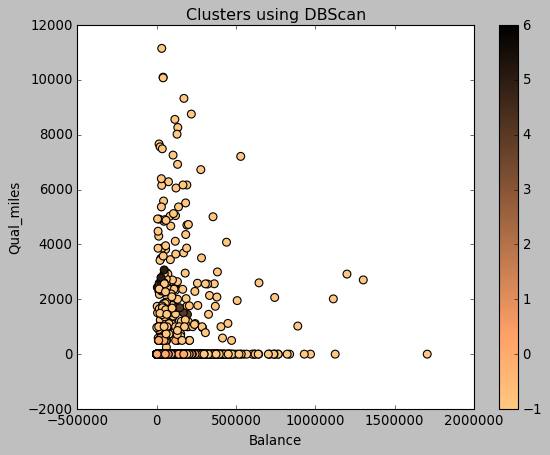

In [87]:
df1.plot(x="Balance",y ="Qual_miles",c=dbscan.labels_ ,kind="scatter",s=50 ,cmap=plt.cm.copper_r) 
plt.title('Clusters using DBScan') 

Text(0.5, 1.0, 'Clusters using DBScan')

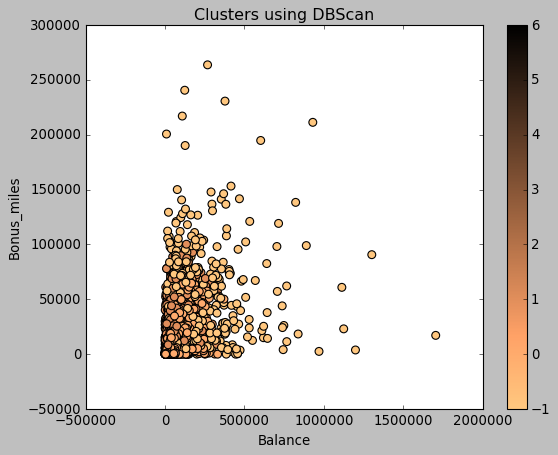

In [88]:
df1.plot(x="Balance",y ="Bonus_miles",c=dbscan.labels_ ,kind="scatter",s=50 ,cmap=plt.cm.copper_r) 
plt.title('Clusters using DBScan') 

In [89]:
dl = dbscan.labels_

In [90]:
from sklearn import metrics

In [91]:
import sklearn
sklearn.metrics.silhouette_score(X, dl)

0.18564846327937298

In [92]:
from sklearn import metrics

In [93]:
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=3)
y_kmeans = clf.fit_predict(X)  

In [94]:
y_kmeans

array([1, 1, 1, ..., 2, 1, 1], dtype=int32)

In [95]:
cl1=pd.DataFrame(y_kmeans,columns=['Kcluster']) 
cl1 

Kcluster
0            1
1            1
2            1
3            1
4            2
5            1
6            2
7            1
8            0
9            2
10           1
11           2
12           1
13           1
14           1
15           2
16           2
17           1
18           2
19           2
20           2
21           0
22           1
23           1
24           1
25           1
26           1
27           1
28           2
29           1
30           2
31           1
32           2
33           1
34           1
35           2
36           1
37           1
38           2
39           1
40           1
41           2
42           0
43           2
44           2
45           2
46           1
47           1
48           2
49           1
50           0
51           1
52           2
53           1
54           1
55           1
56           2
57           1
58           2
59           2
60           2
61           1
62           1
63           1
64           1
65           0
66           1
67           2
68           2
69           2
70           2
71           2
72           2
73           1
74           2
75           2
76           1
77           2
78           2
79           2
80           1
81           1
82           1
83           1
84           1
85           2
86           1
87           2
88           1
89           1
90           1
91           1
92           2
93           1
94           0
95           1
96           1
97           2
98           1
99           2
100          2
101          1
102          1
103          1
104          1
105          2
106          0
107          1
108          2
109          2
110          2
111          0
112          0
113          1
114          2
115          2
116          1
117          2
118          2
119          1
120          1
121          2
122          2
123          2
124          2
125          2
126          2
127          0
128          2
129          2
130          1
131          1
132          1
133          1
134          2
135          0
136          2
137          2
138          2
139          1
140          1
141          1
142          1
143          2
144          2
145          1
146          1
147          2
148          2
149          1
150          2
151          2
152          2
153          1
154          2
155          2
156          2
157          2
158          2
159          1
160          2
161          2
162          1
163          2
164          2
165          1
166          1
167          2
168          2
169          2
170          2
171          1
172          2
173          2
174          2
175          2
176          2
177          2
178          1
179          1
180          1
181          2
182          1
183          2
184          2
185          2
186          0
187          1
188          2
189          1
190          2
191          0
192          2
193          1
194          1
195          1
196          2
197          2
198          1
199          2
200          2
201          2
202          1
203          2
204          1
205          1
206          2
207          1
208          2
209          1
210          2
211          1
212          1
213          2
214          1
215          2
216          1
217          1
218          2
219          2
220          0
221          2
222          1
223          1
224          2
225          1
226          1
227          2
228          1
229          2
230          2
231          2
232          1
233          1
234          1
235          2
236          1
237          2
238          0
239          1
240          2
241          1
242          2
243          0
244          2
245          0
246          1
247          1
248          2
249          1
250          1
251          1
252          2
253          2
254          1
255          2
256          0
257          2
258          1
259          2
260          1
261          1
262          1
263          1
264          1
265          2
2

In [96]:
df2 = pd.concat([df1,cl1],axis=1) 
df2 

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
5        6    16420           0          1          1          1            0   
6        7    84914           0          3          1          1        27482   
7        8    20856           0          1          1          1         5250   
8        9   443003           0          3          2          1         1753   
9       10   104860           0          3          1          1        28426   
10      11    40091           0          2          1          1         7278   
11      12    96522           0          5          1          1        61105   
12      13    43382           0          2          1          1        11150   
13      14    43097           0          1          1          1         3258   
14      15    17648           0          1          1          1            0   
15      16    28495           0          4          1          1        49442   
16      17    51890           0          4          1          1        48963   
17      18    13958           0          1          1          1         4291   
18      19    91473           0          3          1          1        27408   
19      20    23354           0          3          1          1        10447   
20      21   120576           0          5          1          1        58831   
21      22   185681        2024          1          1          1        13300   
22      23    20584           0          1          1          1         3450   
23      24    66275           0          1          1          1         2533   
24      25   205651         500          1          1          1         4025   
25      26    20726           0          1          1          1         1375   
26      27    18521           0          1          1          1         1227   
27      28     8828           0          1          1          1            0   
28      29    59763           0          3          1          1        33772   
29      30    19221           0          1          1          1         4655   
30      31   177926           0          3          1          1        20797   
31      32    10021           0          1          1          1            0   
32      33   276571           0          4          1          1        42044   
33      34    18047           0          1          1          1          100   
34      35    43832           0          1          1          1            0   
35      36   123759           0          4          1          1        50572   
36      37    23193           0          1          1          1          650   
37      38    68666           0          1          1          1          350   
38      39    59990           0          3          1          1        27878   
39      40     2176           0          1          1          1            0   
40      41    34616           0          1          1          1         1750   
41      42    10470           0          4          1          1        38094   
42      43    60313           0          1          1          1        10000   
43      44   619393           0          3          1          1        15008   
44      45   121260           0          3          1          1        18493   
45      46   288865         967          1          1          1        23600   
46      47    92336           0          2          1          1        11214   
47      48    36924           0          1          1          1         5900   
48      49    70312           0       

Text(0.5, 1.0, 'Clusters using KMeans')

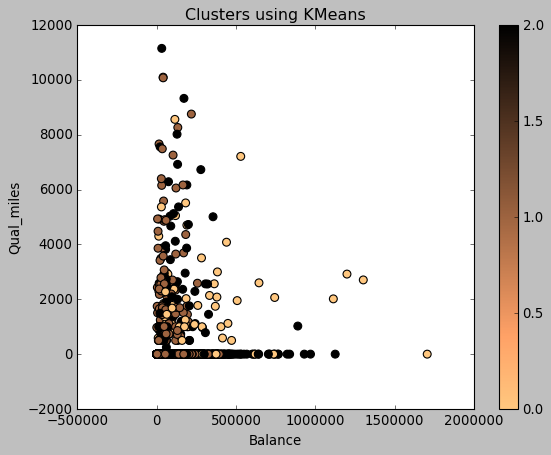

In [97]:
df2.plot(x="Balance",y ="Qual_miles",c=y_kmeans ,kind="scatter",s=50 ,cmap=plt.cm.copper_r) 
plt.title('Clusters using KMeans') 

Text(0.5, 1.0, 'Clusters using KMeans')

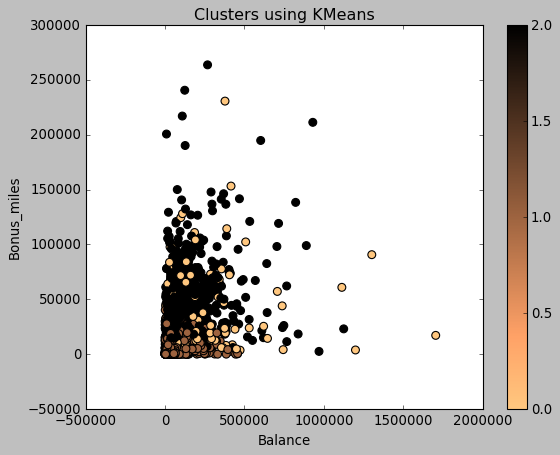

In [98]:
df2.plot(x="Balance",y ="Bonus_miles",c=y_kmeans ,kind="scatter",s=50 ,cmap=plt.cm.copper_r) 
plt.title('Clusters using KMeans') 

In [99]:
sklearn.metrics.silhouette_score(X, y_kmeans)

0.31147089911572406